In [1]:
#Import relevant libraries
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
directory = 'Blue Bikes Trip Data'

In [4]:
#Getting the data from current directory to the notebook.
list_2019 = sorted(glob.glob(os.path.join(directory,'2019*-bluebikes*.csv')))
list_2020 = sorted(glob.glob(os.path.join(directory,'2020*-bluebikes*.csv')))
list_2021 = sorted(glob.glob(os.path.join(directory,'2021*-bluebikes*.csv')))
list_2022 = sorted(glob.glob(os.path.join(directory,'2022*-bluebikes*.csv')))
list_2023 = sorted(glob.glob(os.path.join(directory,'2023*-bluebikes*.csv')))

In [5]:
df_2019 = pd.DataFrame()
df_2020 = pd.DataFrame()
df_2021 = pd.DataFrame()
df_2022 = pd.DataFrame()
df_2023 = pd.DataFrame()

In [6]:
for year in range(2019, 2024):
    temp_list = []
    list_files = globals()[f'list_{year}']  # Use the variable `list_2019`, `list_2020`, etc.

    for file in list_files:
        df = pd.read_csv(file)
        if 'tripduration' in df.columns:
            df.drop(['tripduration'], axis=1, inplace=True)
        elif 'ride_id' in df.columns:
            df.iloc[:, [0, 1, 2, 3, 5, 4, 8, 9, 7, 6, 10, 11, 12]]
            df = df.rename(columns={"started_at": "starttime", "ended_at": "stoptime", \
                              'start_station_id':'start station id', 'start_station_name':'start station name',\
                              'start_lat':'start station latitude', 'start_lng':'start station longitude',\
                              'end_station_id':'end station id', 'end_station_name':'end station name',\
                              'end_lat':'end station latitude', 'end_lng':'end station longitude',\
                              'member_casual':'usertype'})
            df.drop(['ride_id', 'rideable_type'], axis=1, inplace=True)
        temp_list.append(df)

    globals()[f'temp_list_{year}'] = temp_list  # Create a variable `temp_list_2019`, `temp_list_2020`, etc.
    globals()[f'df_{year}'] = pd.concat(temp_list)

In [7]:
station_data = pd.read_csv('Blue Bikes Trip Data/current_bluebikes_stations.csv', skiprows=1, header=0)
station_data.head()

,Number,Name,Latitude,Longitude,District,Public,Total docks
0,K32015,1200 Beacon St,42.344149,-71.114674,Brookline,Yes,15
1,W32006,160 Arsenal St,42.364664,-71.175694,Watertown,Yes,11
2,A32019,175 N Harvard St,42.364475,-71.128408,Boston,Yes,17
3,S32035,191 Beacon St,42.380323,-71.108786,Somerville,Yes,19
4,C32094,2 Hummingbird Lane at Olmsted Green,42.288870,-71.095003,Boston,Yes,17


In [8]:
for year in range(2019, 2024):
    globals()[f'df_{year}'] = globals()[f'df_{year}'][['starttime', 'stoptime', 'start station id', 'start station name','start station latitude','start station longitude','end station id', 'end station name', 'end station latitude','end station longitude']].dropna()
    globals()[f'df_{year}'] = globals()[f'df_{year}'].merge(station_data[['Name', 'District']], left_on='start station name', right_on='Name', how='left').drop(columns=['Name'])

In [9]:
for year in range(2019, 2024):
  length = len(globals()[f'df_{year}'])
  nan = globals()[f'df_{year}']['District'].isna().sum()
  print(length, nan, nan/length)

2522771 265549 0.10526084214540281
2073448 211059 0.10179131572144563
2934378 270246 0.09209651926234452
3757281 279439 0.07437266470088343
3675945 257471 0.07004212522222177


In [12]:
df = pd.concat([df_2019,df_2020,df_2021,df_2022,df_2023])

In [13]:
# extracting year, month, day, hour and day of week from the starttime timestamp
df['starttime'] = pd.to_datetime(df['starttime'], format='mixed')
df['month'] = df['starttime'].dt.month
df['day'] = df['starttime'].dt.day
df['year'] = df['starttime'].dt.year
df['hour'] = df['starttime'].dt.hour
df["weekday"] = df['starttime'].dt.dayofweek

In [15]:
df = df.sort_values(by='starttime')

In [16]:
#Mapping weekday and weekend to 0 and 1
def isweekday(weekday):
    if weekday == 0 or weekday == 6:
        return 0
    else:
        return 1

In [17]:
df['is_week_day'] = df["weekday"].apply(isweekday)

In [18]:
#creating a new column season using the month column
def season(mon):
    if mon>=3 and mon<=5:
        return "Spring"
    elif mon>=6 and mon<=8:
        return "Summer"
    elif mon>=9 and mon<=11:
        return "Fall"
    else:
        return "Winter"

In [19]:
df['season'] = df['month'].apply(season)

In [20]:
df.columns

Index(['starttime', 'stoptime', 'start station id', 'start station name',
       'start station latitude', 'start station longitude', 'end station id',
       'end station name', 'end station latitude', 'end station longitude',
       'District', 'month', 'day', 'year', 'hour', 'weekday', 'is_week_day',
       'season'],
      dtype='object')

In [21]:
df["season"].unique()

array(['Winter', 'Spring', 'Summer', 'Fall'], dtype=object)

In [22]:
df['year'] = df['year'].apply(str)

In [23]:
df_weekday = df[df["is_week_day"] == 1]

In [24]:
df_weekday

,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,District,month,day,year,hour,weekday,is_week_day,season
0,2019-01-01 00:09:13.798,2019-01-01 00:15:25.3360,80,MIT Stata Center at Vassar St / Main St,42.362131,-71.091156,179,MIT Vassar St,42.355601,-71.103945,Cambridge,1,1,2019,0,1,1,Winter
1,2019-01-01 00:33:56.182,2019-01-01 00:38:20.8800,117,Binney St / Sixth St,42.366162,-71.086883,189,Kendall T,42.362428,-71.084955,Cambridge,1,1,2019,0,1,1,Winter
2,2019-01-01 00:41:54.600,2019-01-01 00:49:33.2730,68,Central Square at Mass Ave / Essex St,42.365070,-71.103100,96,Cambridge Main Library at Broadway / Trowbridg...,42.373379,-71.111075,Cambridge,1,1,2019,0,1,1,Winter
3,2019-01-01 00:43:32.571,2019-01-01 00:49:37.4260,89,Harvard Law School at Mass Ave / Jarvis St,42.379011,-71.119945,334,Mass Ave at Hadley/Walden,42.391210,-71.122608,Cambridge,1,1,2019,0,1,1,Winter
4,2019-01-01 00:49:56.464,2019-01-01 01:01:17.7010,73,Harvard Square at Brattle St / Eliot St,42.373231,-71.120886,367,Vassal Lane at Tobin/VLUS,42.383932,-71.139613,Cambridge,1,1,2019,0,1,1,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3637361,2023-12-30 23:51:17.000,2023-12-30 23:55:51,B32032,Government Center - Cambridge St at Court St,42.359825,-71.059796,D32017,Mugar Way at Beacon St,42.355536,-71.072869,Boston,12,30,2023,23,5,1,Winter
3524038,2023-12-30 23:53:55.000,2023-12-31 00:08:07,D32015,Chinatown Gate Plaza,42.351356,-71.059367,A32026,Purchase St at Pearl St,42.354659,-71.053181,Boston,12,30,2023,23,5,1,Winter
3615615,2023-12-30 23:55:40.000,2023-12-31 00:31:26,K32004,JFK Crossing at Harvard St. / Thorndike St.,42.346551,-71.128332,M32054,699 Mt Auburn St,42.375002,-71.148716,Brookline,12,30,2023,23,5,1,Winter
3615616,2023-12-30 23:57:45.000,2023-12-31 00:31:36,K32004,JFK Crossing at Harvard St. / Thorndike St.,42.346551,-71.128332,M32054,699 Mt Auburn St,42.375002,-71.148716,Brookline,12,30,2023,23,5,1,Winter


In [25]:
df_weekend = df[df["is_week_day"] == 0]

In [26]:
df_weekend

,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,District,month,day,year,hour,weekday,is_week_day,season
11125,2019-01-06 00:00:21.328,2019-01-06 00:06:39.1980,84,CambridgeSide Galleria - CambridgeSide PL at L...,42.366981,-71.076472,91,One Kendall Square at Hampshire St / Portland St,42.366277,-71.091690,Cambridge,1,6,2019,0,6,0,Winter
11126,2019-01-06 00:01:04.850,2019-01-06 00:15:23.6420,68,Central Square at Mass Ave / Essex St,42.365070,-71.103100,176,Lesley University,42.386748,-71.119019,Cambridge,1,6,2019,0,6,0,Winter
11127,2019-01-06 00:12:32.224,2019-01-06 00:24:49.7330,185,Third at Binney,42.365445,-71.082771,184,Sidney Research Campus/ Erie Street at Waverly,42.357753,-71.103934,Cambridge,1,6,2019,0,6,0,Winter
11128,2019-01-06 00:14:06.028,2019-01-06 00:28:43.9750,206,Government Center - Cambridge St at Court St,42.359803,-71.059608,88,Inman Square at Vellucci Plaza / Hampshire St,42.374035,-71.101427,Boston,1,6,2019,0,6,0,Winter
11129,2019-01-06 00:18:32.514,2019-01-06 00:26:34.0050,8,Union Square - Brighton Ave at Cambridge St,42.353334,-71.137313,175,Brighton Center - Washington St at Cambridge St,42.348949,-71.150272,Boston,1,6,2019,0,6,0,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3567402,2023-12-31 23:47:34.000,2024-01-01 00:26:32,C32053,Broadway T Stop,42.343049,-71.058034,C32053,Broadway T Stop,42.343049,-71.058034,Boston,12,31,2023,23,6,0,Winter
3545777,2023-12-31 23:48:09.000,2023-12-31 23:56:43,A32026,Purchase St at Pearl St,42.354659,-71.053181,C32024,State Street at Channel Center,42.344137,-71.052608,Boston,12,31,2023,23,6,0,Winter
3649228,2023-12-31 23:51:58.000,2024-01-01 00:30:50,B32014,Seaport Hotel - Congress St at Seaport Ln,42.348810,-71.041677,B32014,Seaport Hotel - Congress St at Seaport Ln,42.348810,-71.041677,Boston,12,31,2023,23,6,0,Winter
3652820,2023-12-31 23:52:30.000,2024-01-01 00:43:24,D32046,Boylston St at Exeter St,42.349589,-71.079468,D32046,Boylston St at Exeter St,42.349589,-71.079468,Boston,12,31,2023,23,6,0,Winter


In [27]:
rentals_per_hour = pd.value_counts(df['hour'])
rentals_per_hour

hour
17    1326682
18    1161322
16    1127561
19     960122
15     908468
20     833097
21     825644
12     824756
13     812655
14     811327
22     714583
8      699523
11     631090
23     526583
9      521282
10     488451
7      428011
0      354473
1      258997
6      212192
2      190989
3      128639
5      124083
4       93293
Name: count, dtype: int64

In [28]:
rph_df = rentals_per_hour.to_frame()
rph_df.reset_index(inplace=True)
rph_df.rename(columns = {'hour' : 'time', 'count' : 'rides'},inplace=True)

In [29]:
rph_df

,time,rides
0,17,1326682
1,18,1161322
2,16,1127561
3,19,960122
4,15,908468
5,20,833097
6,21,825644
7,12,824756
8,13,812655
9,14,811327


In [30]:
df_grouped = df.groupby("year")

In [31]:
df_grouped

In [32]:
rentals_per_hour_2019 = pd.value_counts(df_grouped.get_group("2019")["hour"])
rph_df_2019 = rentals_per_hour_2019.to_frame()
rph_df_2019.reset_index(inplace=True)
rph_df_2019.rename(columns = {'index' : 'time', 'hour' : 'rides'},inplace=True)

rentals_per_hour_2020 = pd.value_counts(df_grouped.get_group("2020")["hour"])
rph_df_2020 = rentals_per_hour_2020.to_frame()
rph_df_2020.reset_index(inplace=True)
rph_df_2020.rename(columns = {'index' : 'time', 'hour' : 'rides'},inplace=True)

rentals_per_hour_2021 = pd.value_counts(df_grouped.get_group("2021")["hour"])
rph_df_2021 = rentals_per_hour_2021.to_frame()
rph_df_2021.reset_index(inplace=True)
rph_df_2021.rename(columns = {'index' : 'time', 'hour' : 'rides'},inplace=True)

rentals_per_hour_2022 = pd.value_counts(df_grouped.get_group("2022")["hour"])
rph_df_2022 = rentals_per_hour_2022.to_frame()
rph_df_2022.reset_index(inplace=True)
rph_df_2022.rename(columns = {'index' : 'time', 'hour' : 'rides'},inplace=True)

rentals_per_hour_2023 = pd.value_counts(df_grouped.get_group("2023")["hour"])
rph_df_2023 = rentals_per_hour_2023.to_frame()
rph_df_2023.reset_index(inplace=True)
rph_df_2023.rename(columns = {'index' : 'time', 'hour' : 'rides'},inplace=True)

In [33]:
rph_df.sort_values(by=['time'], inplace = True)

In [34]:
rph_df

,time,rides
17,0,354473
18,1,258997
20,2,190989
21,3,128639
23,4,93293
22,5,124083
19,6,212192
16,7,428011
11,8,699523
14,9,521282


In [35]:
rentals_per_hour_weekday = pd.value_counts(df_weekday['hour'])
rph_df_weekday = rentals_per_hour_weekday.to_frame()
rph_df_weekday.reset_index(inplace=True)
rph_df_weekday.rename(columns = {'hour' : 'time', 'count' : 'rides'},inplace=True)
rph_df_weekday.sort_values(by=['time'], inplace = True)

In [36]:
rph_df_weekday

,time,rides
17,0,253412
18,1,179259
20,2,132127
21,3,87828
23,4,61998
22,5,84729
19,6,159144
16,7,339333
10,8,555653
14,9,394058


In [37]:
rentals_per_hour_weekend = pd.value_counts(df_weekend['hour'])
rph_df_weekend = rentals_per_hour_weekend.to_frame()
rph_df_weekend.reset_index(inplace=True)
rph_df_weekend.rename(columns = {'hour' : 'time', 'count' : 'rides'},inplace=True)
rph_df_weekend.sort_values(by=['time'], inplace = True)

In [38]:
rph_df_weekend

,time,rides
16,0,101061
18,1,79738
19,2,58862
21,3,40811
23,4,31295
22,5,39354
20,6,53048
17,7,88678
12,8,143870
14,9,127224


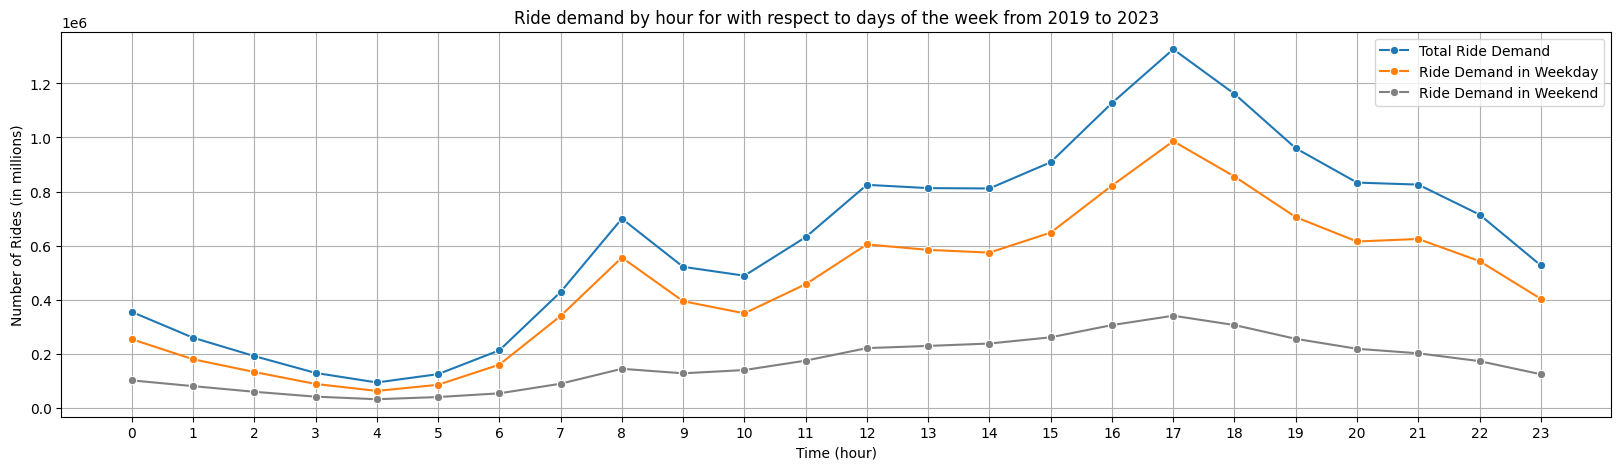

In [39]:
plt.figure(figsize=(20,5))
sns.lineplot(x = "time", y = "rides", data=rph_df, label = "Total Ride Demand", marker = "o")
sns.lineplot(x = "time", y = "rides", data = rph_df_weekday, label = "Ride Demand in Weekday", marker = "o")
sns.lineplot(x = "time", y = "rides", data = rph_df_weekend, label = "Ride Demand in Weekend", marker = "o", color = "grey")
plt.xlabel("Time (hour)")
plt.ylabel("Number of Rides (in millions)")
plt.xticks(rph_df["time"])
plt.title("Ride demand by hour for with respect to days of the week from 2019 to 2023")
plt.grid()
plt.show()

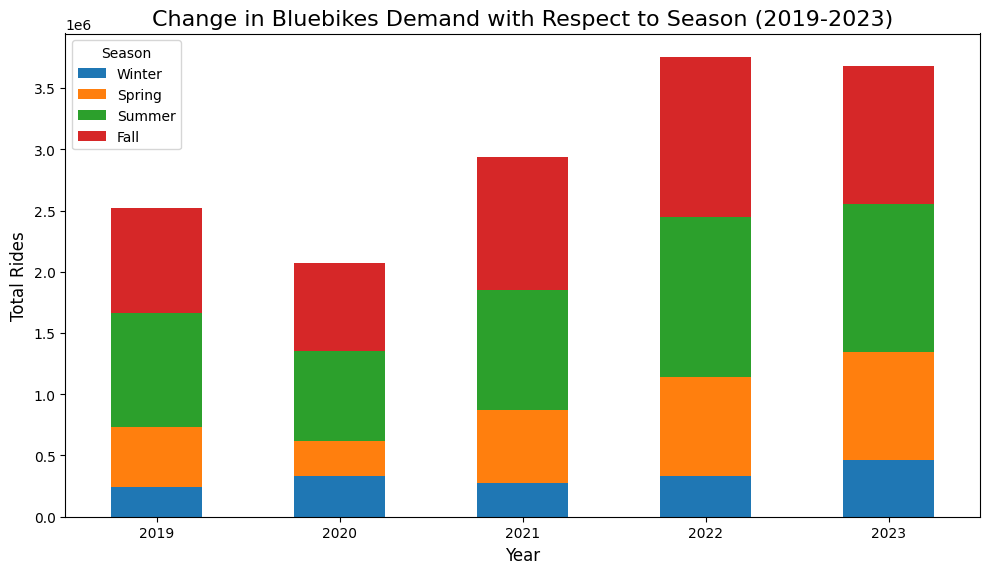

In [41]:
# Group by year and season, then count the number of rides
seasonal_data = df.groupby(['year', 'season']).size().unstack()

custom_colors = {
    'Winter': '#1f77b4',  # Blue
    'Spring': '#2ca02c',  # Green
    'Summer': '#ff7f0e',  # Orange
    'Fall': '#d62728'     # Red
}

seasonal_data = seasonal_data[custom_colors.keys()]

# Create the bar plot
seasonal_data.plot(kind='bar', stacked=True, figsize=(10, 6))

# Customize the plot
plt.title('Change in Bluebikes Demand with Respect to Season (2019-2023)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Rides', fontsize=12)
plt.legend(title='Season', fontsize=10)
plt.xticks(rotation=0, fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()

In [51]:
df.to_csv('concat_data.csv', index=False)